In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the images from the specified directory
train_dataset = image_dataset_from_directory(
    directory="D:\\Downloads\\archive 3\\Training Data\\Training Data",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)  # Adjusted image size to 256x256
)

# The dataset is now ready to be used for training, with images automatically labeled according to their directory names.


Found 30000 files belonging to 15 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation

# Define the data augmentation and normalization layers
data_augmentation = tf.keras.Sequential([
    Rescaling(1./255) 
])

# Apply the data augmentation to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the sequential model
animal = models.Sequential([
    
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output and feed it into a dense layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    
    # Output layer with 15 classes (softmax activation for multi-class classification)
    layers.Dense(15, activation='softmax')
])

# Compile the model
animal.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
animal.summary()


C:\Users\sreej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,840,911 (56.61 MB)

 Trainable params: 14,840,911 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
animal.fit(train_dataset, epochs=20)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1438s 2s/step - accuracy: 0.3010 - loss: 2.1950
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1420s 2s/step - accuracy: 0.5883 - loss: 1.3085
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1276s 1s/step - accuracy: 0.7249 - loss: 0.8756
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1283s 1s/step - accuracy: 0.8542 - loss: 0.4638
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1265s 1s/step - accuracy: 0.9249 - loss: 0.2416
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1214s 1s/step - accuracy: 0.9532 - loss: 0.1484
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1220s 1s/step - accuracy: 0.9638 - loss: 0.1157
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1206s 1s/step - accuracy: 0.9700 - loss: 0.0962
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1179s 1s/step - accuracy: 0.9742 - loss: 0.0850
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1170s 1s/step - accuracy: 0.9764 - loss: 0.0859
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1157s 1s/step - accuracy: 0.9809 - loss: 0.0605
Epoch 12/20
938/938 ━━━━━━━━━━

In [6]:
# Save the model to the specified directory
save_path = "D:/Downloads/archive 3/Training Data/animal_model.keras"
animal.save(save_path)

print(f"Model saved to {save_path}")


Model saved to D:/Downloads/archive 3/Training Data/animal_model.keras


In [4]:
from PIL import Image
import os

# Define the directory containing the images
test_image_dir = "D:/Downloads/archive 3/Training Data/Testing Data"

# Supported image formats
supported_formats = ["JPEG", "PNG", "GIF", "BMP"]

# Iterate over all files in the directory
for root, dirs, files in os.walk(test_image_dir):
    for file in files:
        try:
            # Open the image file
            img = Image.open(os.path.join(root, file))
            # Check if the format is supported
            if img.format not in supported_formats:
                print(f"Unsupported format: {file} - {img.format}")
            img.close()
        except Exception as e:
            print(f"Error processing file: {file} - {e}")


Unsupported format: Lizard-Testing (6).jpg - WEBP


Found 2405 files belonging to 15 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━

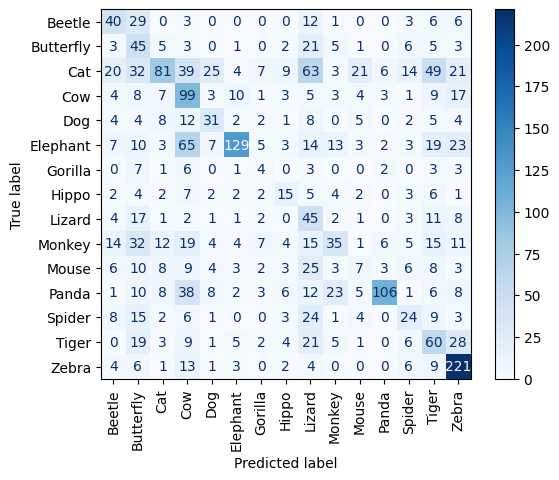

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

# Load the saved model
model_path = "D:/Downloads/archive 3/Training Data/animal_model.keras"
model = load_model(model_path)

# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="D:/Downloads/archive 3/Training Data/Testing Data",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

# Get true labels and predictions
y_true = np.array([])
y_pred = np.array([])

for images, labels in test_dataset:
    predictions = model.predict(images)
    y_true = np.concatenate([y_true, labels.numpy()])
    y_pred = np.concatenate([y_pred, np.argmax(predictions, axis=1)])

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
class_names = ["Beetle", "Butterfly", "Cat", "Cow", "Dog", "Elephant", 
               "Gorilla", "Hippo", "Lizard", "Monkey", "Mouse", "Panda", 
               "Spider", "Tiger", "Zebra"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.show()


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support,accuracy_score
from tensorflow.keras.models import load_model

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.48
Recall: 0.39
F1 Score: 0.40
Accuracy: 0.39


In [13]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the input shape for VGG16
input_shape = (224, 224, 3)

# Load VGG16 model without top layers (classification head) with custom input shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model
base_model.trainable = False

# Create a new model on top of the pre-trained base
inputs = tf.keras.Input(shape=input_shape)
x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(15, activation='softmax')(x)  # Adjust the number of units to match your number of classes

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary to verify architecture
model.summary()

# Data preparation with resizing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'D:/Downloads/archive 3/Training Data/Training Data',
    target_size=input_shape[:2],  # Resize images to (224, 224)
    batch_size=32,
    class_mode='sparse'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    'D:/Downloads/archive 3/Training Data/Testing Data',
    target_size=input_shape[:2],  # Resize images to (224, 224)
    batch_size=32,
    class_mode='sparse'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,141,327 (80.65 MB)

 Trainable params: 6,426,639 (24.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 30000 images belonging to 15 classes.
Found 2405 images belonging to 15 classes.
Epoch 1/10


C:\Users\sreej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 6291s 7s/step - accuracy: 0.2993 - loss: 2.2345 - val_accuracy: 0.6029 - val_loss: 1.2588
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6332s 7s/step - accuracy: 0.4765 - loss: 1.5072 - val_accuracy: 0.6258 - val_loss: 1.1565
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6309s 7s/step - accuracy: 0.5053 - loss: 1.4140 - val_accuracy: 0.6740 - val_loss: 1.0250
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6262s 7s/step - accuracy: 0.5307 - loss: 1.3510 - val_accuracy: 0.6462 - val_loss: 1.1265
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7064s 8s/step - accuracy: 0.5415 - loss: 1.3183 - val_accuracy: 0.6595 - val_loss: 1.0271
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6213s 7s/step - accuracy: 0.5401 - loss: 1.3107 - val_accuracy: 0.7031 - val_loss: 0.9392
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6216s 7s/step - accuracy: 0.5689 - loss: 1.2441 - val_accuracy: 0.6873 - val_loss: 0.9799
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6200s 7s/step - accuracy: 0.5737 - loss: 1.2302 - val_accurac

In [14]:
print(history)

In [15]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the input shape for VGG16
input_shape = (224, 224, 3)

# Load VGG16 model without top layers (classification head) with custom input shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model
base_model.trainable = False

# Create a new model on top of the pre-trained base
inputs = tf.keras.Input(shape=input_shape)
x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(15, activation='softmax')(x)  # Adjust the number of units to match your number of classes

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary to verify architecture
model.summary()

# Data preparation with resizing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'D:/Downloads/archive 3/Training Data/Training Data',  # Directory path for training data
    target_size=input_shape[:2],  # Resize images to (224, 224)
    batch_size=32,
    class_mode='sparse'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    'D:/Downloads/archive 3/Training Data/Testing Data',  # Directory path for testing data
    target_size=input_shape[:2],  # Resize images to (224, 224)
    batch_size=32,
    class_mode='sparse'
)

# Set up learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,141,327 (80.65 MB)

 Trainable params: 6,426,639 (24.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 30000 images belonging to 15 classes.
Found 2405 images belonging to 15 classes.


In [16]:

# Train the model for initial 10 epochs
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6541s 7s/step - accuracy: 0.2075 - loss: 2.4813 - val_accuracy: 0.5252 - val_loss: 1.5675 - learning_rate: 0.0010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6365s 7s/step - accuracy: 0.3259 - loss: 1.9422 - val_accuracy: 0.5380 - val_loss: 1.5353 - learning_rate: 0.0010
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6383s 7s/step - accuracy: 0.3411 - loss: 1.8856 - val_accuracy: 0.5788 - val_loss: 1.3886 - learning_rate: 0.0010
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6315s 7s/step - accuracy: 0.3652 - loss: 1.8387 - val_accuracy: 0.5667 - val_loss: 1.3835 - learning_rate: 0.0010
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6239s 7s/step - accuracy: 0.3673 - loss: 1.8236 - val_accuracy: 0.6108 - val_loss: 1.3024 - learning_rate: 0.0010
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6252s 7s/step - accuracy: 0.3693 - loss: 1.8049 - val_accuracy: 0.5963 - val_loss: 1.3029 - learning_rate: 0.0010
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6266s 7s/step - accuracy: 0.3765 - l

In [17]:
# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model again with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:

# Fine-tune the model for additional epochs
history_fine = model.fit(
    train_generator,
    epochs=20,  # Additional epochs for fine-tuning
    validation_data=validation_generator,
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11284s 12s/step - accuracy: 0.4123 - loss: 1.6754 - val_accuracy: 0.6807 - val_loss: 1.0753 - learning_rate: 1.0000e-05
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16345s 17s/step - accuracy: 0.4409 - loss: 1.5597 - val_accuracy: 0.6902 - val_loss: 0.9928 - learning_rate: 1.0000e-05
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7355s 8s/step - accuracy: 0.4776 - loss: 1.4648 - val_accuracy: 0.7281 - val_loss: 0.9001 - learning_rate: 1.0000e-05
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7488s 8s/step - accuracy: 0.5136 - loss: 1.3769 - val_accuracy: 0.7455 - val_loss: 0.8455 - learning_rate: 1.0000e-05
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7278s 8s/step - accuracy: 0.5589 - loss: 1.2796 - val_accuracy: 0.7771 - val_loss: 0.7549 - learning_rate: 1.0000e-05
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7216s 8s/step - accuracy: 0.6123 - loss: 1.1713 - val_accuracy: 0.7784 - val_loss: 0.7361 - learning_rate: 1.0000e-05
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7185s 8s

In [19]:
model.save(r'D:\Downloads\archive 3\Training Data\TUNED_model.keras')

Found 2405 files belonging to 15 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━

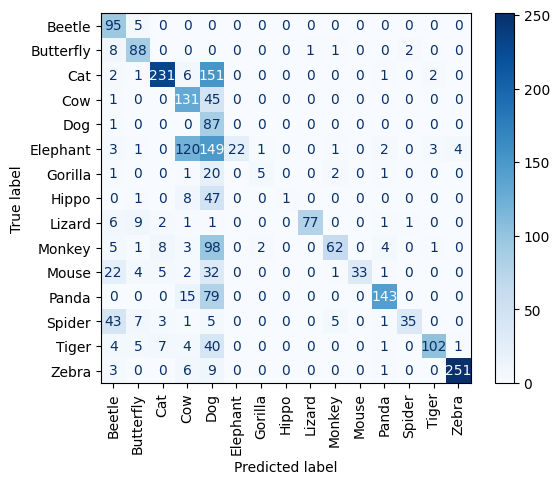

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

# Load the saved model
model_path = "D:/Downloads/archive 3/Training Data/TUNED_model.keras"
model = load_model(model_path)

# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="D:/Downloads/archive 3/Training Data/Testing Data",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224)
)

# Get true labels and predictions
y_true = np.array([])
y_pred = np.array([])

for images, labels in test_dataset:
    predictions = model.predict(images)
    y_true = np.concatenate([y_true, labels.numpy()])
    y_pred = np.concatenate([y_pred, np.argmax(predictions, axis=1)])

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
class_names = ["Beetle", "Butterfly", "Cat", "Cow", "Dog", "Elephant", 
               "Gorilla", "Hippo", "Lizard", "Monkey", "Mouse", "Panda", 
               "Spider", "Tiger", "Zebra"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.show()


In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support,accuracy_score
from tensorflow.keras.models import load_model

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.84
Recall: 0.57
F1 Score: 0.59
Accuracy: 0.57


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_true and y_pred are your true and predicted labels
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


Precision: 0.8442308552135934
Recall: 0.5667359667359667
F1 Score: 0.5899614357207922
Accuracy: 0.5667359667359667
